<a href="https://colab.research.google.com/github/pavaneswarakula/codeclause/blob/main/Predicting_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries for data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore", category=FutureWarning)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split

In [2]:
# Load in dataset
df = pd.read_csv('Housing.csv')
print(f"The housing dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
df.head()

The housing dataset has 545 rows and 13 columns.


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Data Cleaning in the housing.csv


In [3]:
# Checking for missing value
for col in df:
    null_values = df[col].isnull().sum()
    print(f"{col}: {null_values}%")

# The data is not missing any values in the respective columns
# So we can move on with out analysis

price: 0%
area: 0%
bedrooms: 0%
bathrooms: 0%
stories: 0%
mainroad: 0%
guestroom: 0%
basement: 0%
hotwaterheating: 0%
airconditioning: 0%
parking: 0%
prefarea: 0%
furnishingstatus: 0%


In [4]:
# Checking for any duplicate entries in the dataset
duplicates = df.duplicated().sum()
print(f"Their are {duplicates} duplicates in the dataset.")

# There are no duplicates so we do not have to drop any duplicate rows

Their are 0 duplicates in the dataset.


<Figure size 1200x600 with 0 Axes>

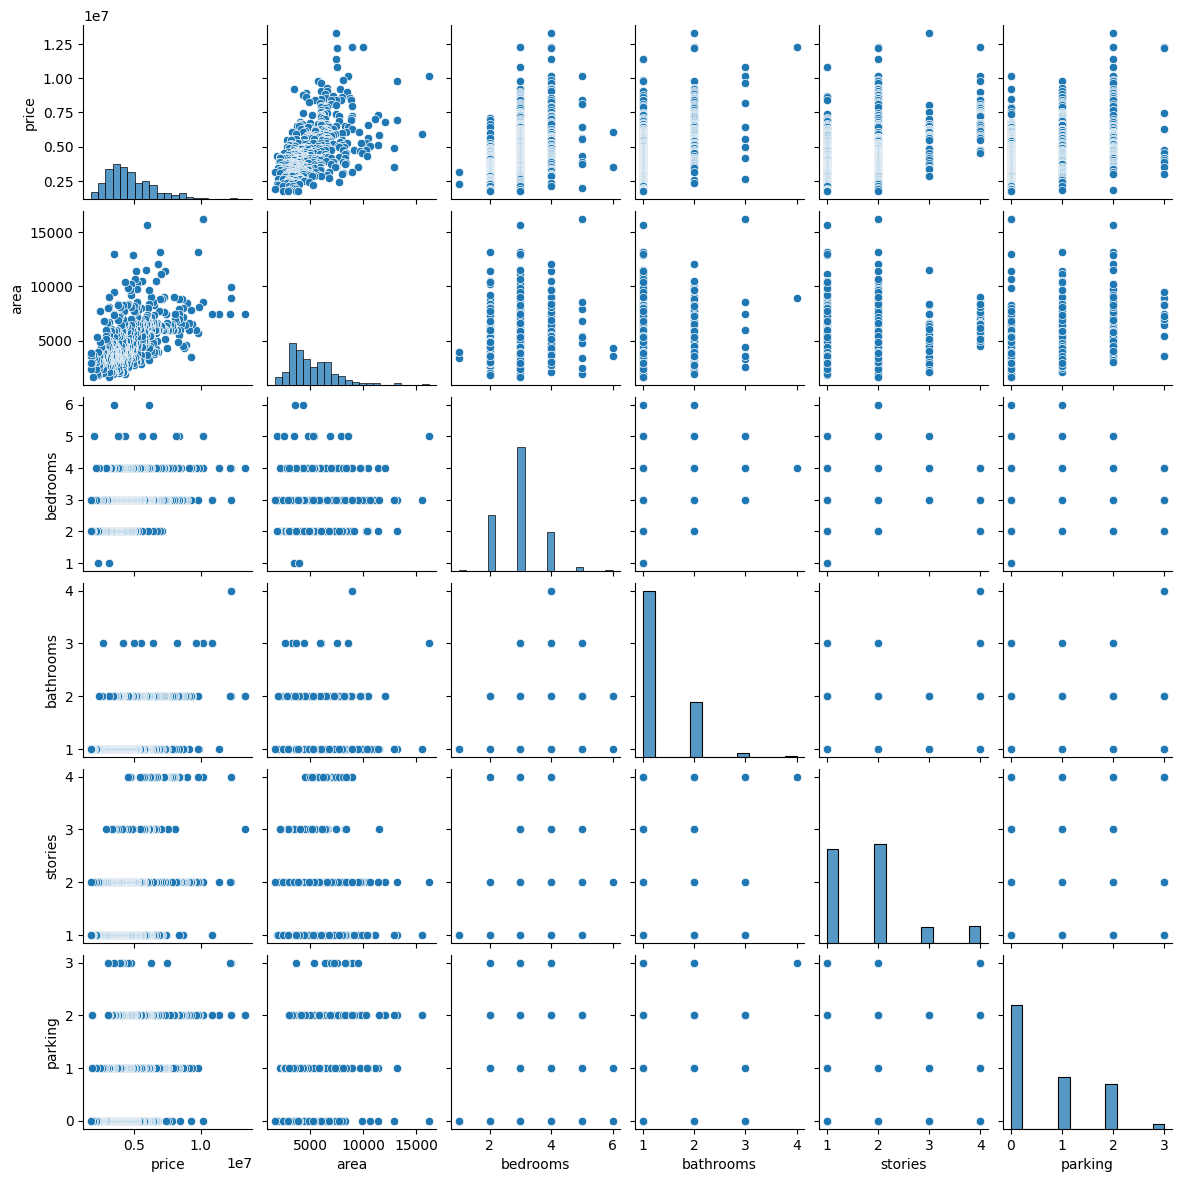

In [5]:
# Plotting a pariplot to see the pairwise relationships in a dataset
plt.figure(figsize=(12,6))
sns.pairplot(df, diag_kind="hist", height=2)
plt.show()

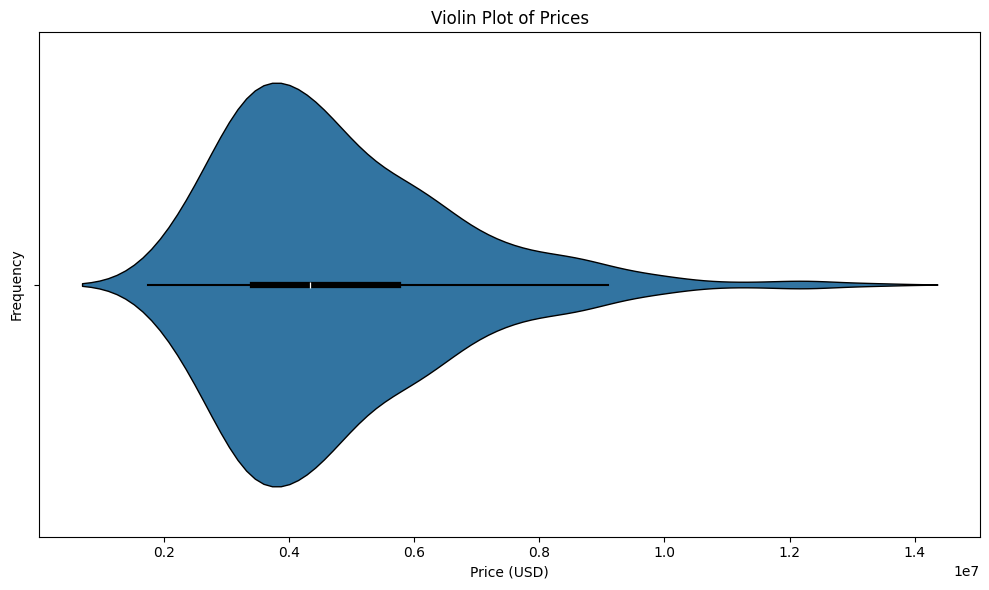

In [6]:
# Plotting a violon plot of the price column to identify outliers
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x=df["price"], linewidth=1, linecolor="k")
plt.title("Violin Plot of Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [8]:

categorical_future_mask = df.dtypes==object

# Filter catergorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_future_mask].tolist()

le = LabelEncoder()

# Apply le on catergorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

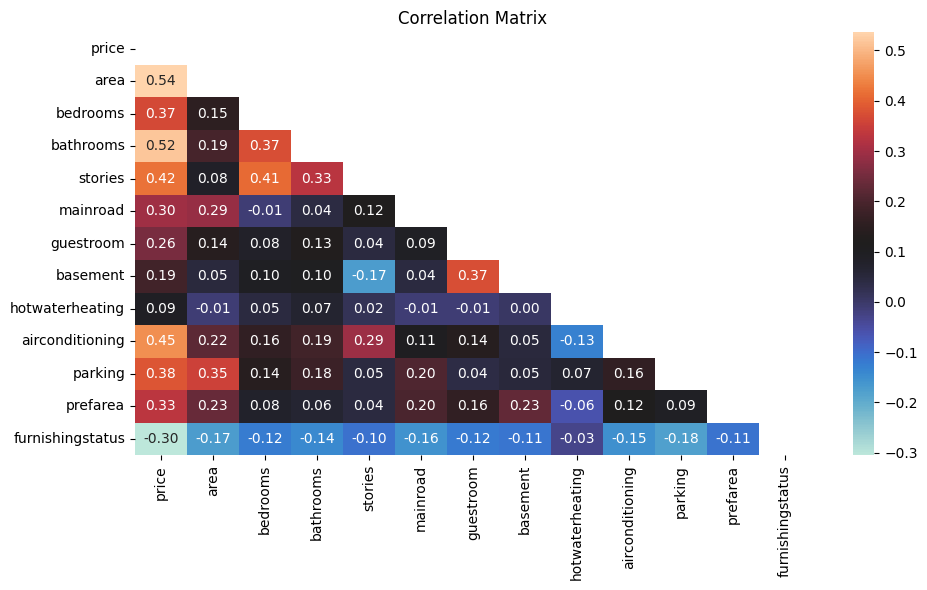

In [9]:
# Plotting a correlation matrix to see the relationship between variables and price
corr = df.corr()
mask_ut = np.triu(np.ones(corr.shape)).astype(np.bool_)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="icefire", mask=mask_ut)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [10]:
# Selecting my independent and dependent variable
X = df["area"].values.reshape(-1,1)
y = df["price"].values

Model Score: 34.58%


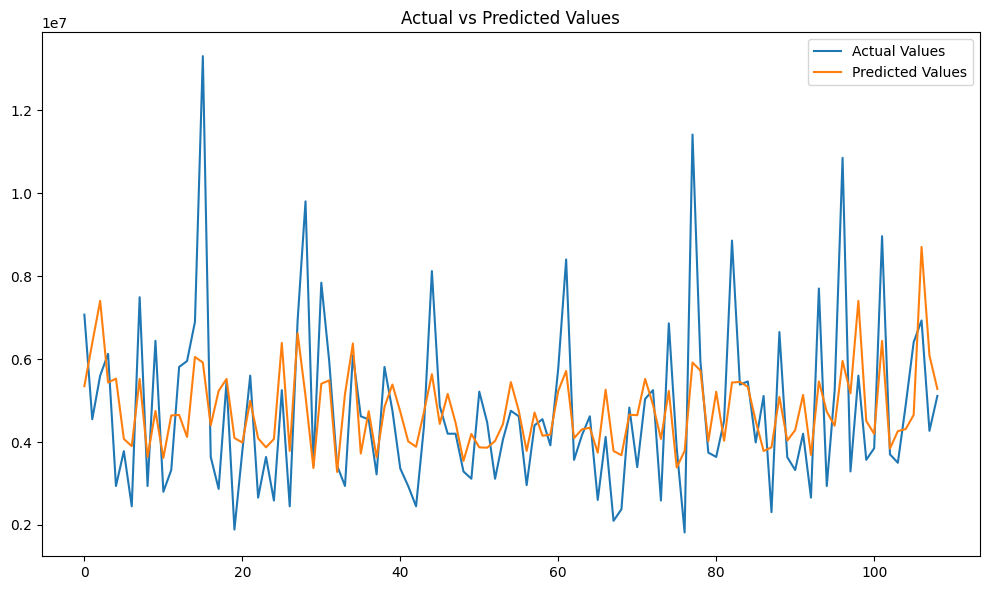

In [11]:
# Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scaling my data
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale  = sc.fit_transform(X_test)

# Implementing a simple linear regression model
lr = LinearRegression()
lr.fit(X_train_scale, y_train)
y_pred = lr.predict(X_test_scale)

# Printing the metrics of the model
print(f"Model Score: {round(lr.score(X_test_scale, y_test) * 100, 2)}%")

# Plotting a predicted values vs the actual values
plt.figure(figsize=(10,6))
plt.plot(y_test, label="Actual Values")
plt.plot(y_pred, label="Predicted Values")
plt.title("Actual vs Predicted Values")
plt.tight_layout()
plt.legend()
plt.show()

In [12]:
# Splitting data into dependent and independent variables
X = df.drop(columns=["price"]).values.reshape(-1, 12)
y = df["price"].values

Model Score 61.97%


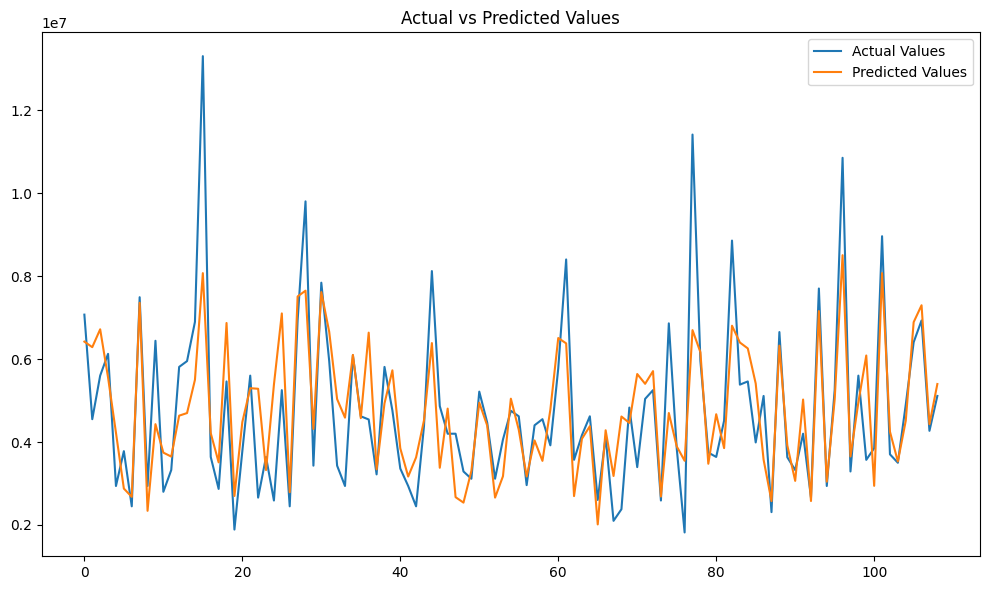

In [13]:
# Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scaling the data
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.fit_transform(X_test)

# Implementing a multiple linear regression model
multiple_lr = LinearRegression()
multiple_lr.fit(X_train_scale, y_train)
y_pred = multiple_lr.predict(X_test_scale)

# Printing the metrics of the model
print(f"Model Score {round(multiple_lr.score(X_test_scale, y_test) * 100, 2)}%")

# Plotting the Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual Values")
plt.plot(y_pred, label="Predicted Values")
plt.title("Actual vs Predicted Values")
plt.tight_layout()
plt.legend()
plt.show()

In [14]:
# Defining my function called outliers
def outliers(df, col="price"):

    # Calculating q1, q3 and the inter-quartile range
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    # Calculating the upper and lower bound
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Creating a list of the indices of the positions of the outliers
    ls = df.index[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Returning ls
    return ls.tolist()

# Calling my function
outlier_list = outliers(df)

In [15]:
# Dropping the outliers from the dataset
df.drop(outlier_list, inplace=True)
print(f"The new shape of the dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The new shape of the dataset has 530 rows and 13 columns


In [16]:
# Splitting data into dependent and independent variables
X = df.drop(columns=["price"]).values.reshape(-1, 12)
y = df["price"].values

Model Score 54.97%


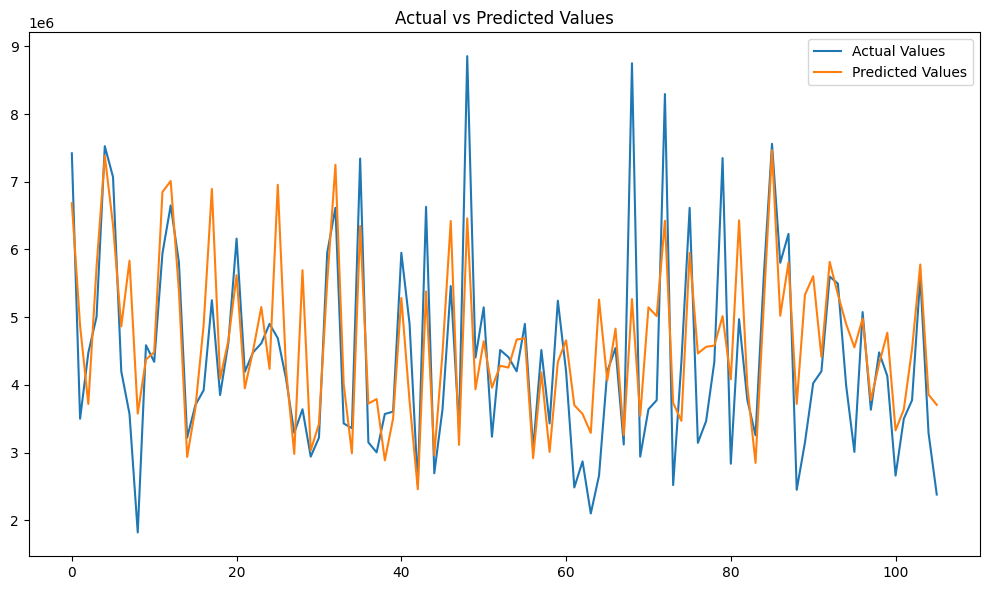

In [17]:
# Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scaling the data
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.fit_transform(X_test)

# Implementing a multiple linear regression model
multiple_lr = LinearRegression()
multiple_lr.fit(X_train_scale, y_train)
y_pred = multiple_lr.predict(X_test_scale)

# Printing the metrics of the model
print(f"Model Score {round(multiple_lr.score(X_test_scale, y_test) * 100, 2)}%")

# Plotting the Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual Values")
plt.plot(y_pred, label="Predicted Values")
plt.title("Actual vs Predicted Values")
plt.tight_layout()
plt.legend()
plt.show()